[back](./00-index.ipynb)

---
## `Text Mining`

### `Imports`

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### `About the dataset`

We are specifically going to build a spam filter, this is a classic use for this kind of classifier and it's not too difficult to set up. The data we'll work with is [UC Irvine's SMS spam dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

### `Access and analyze the raw data`

In [2]:
data_path = ('../../assets/SMSSpamCollection')
sms_raw = pd.read_table(data_path, header=None)
sms_raw.columns = ['spam', 'message']

In [3]:
sms_raw.head(10)

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
sms_raw.spam.value_counts()

ham     4825
spam     747
Name: spam, dtype: int64

In [5]:
sms_raw.shape

(5572, 2)

### `Text analysis`

NLP / Text analysis is about converting the words into columns, into our features.

For example:
```python
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']
```
etc. can be words that we can consider that these could be spam.

In [6]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'money']

for key in keywords:
  # Note that we add spaces around the key so that we're getting the word,
  # not just pattern matching.
  sms_raw[str(key)] = sms_raw.message.str.contains(
    ' ' + str(key) + ' ',
    case=False
  )

In [7]:
sms_raw.head(15)

,spam,message,click,offer,winner,buy,free,cash,urgent,money
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,False,False,False
3,ham,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False
5,spam,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,False,False,False
6,ham,Even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False
7,ham,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,False
8,spam,WINNER!! As a valued network customer you have...,False,False,False,False,False,False,False,False
9,spam,Had your mobile 11 months or more? U R entitle...,False,False,False,False,True,False,False,False


In [8]:
sms_raw['allcaps'] = sms_raw.message.str.isupper() # to check if all the words are in caps
sms_raw[sms_raw.allcaps==True].head(2)

,spam,message,click,offer,winner,buy,free,cash,urgent,money,allcaps
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,False,False,False,False,False,False,False,False,True
43,ham,WHO ARE YOU SEEING?,False,False,False,False,False,False,False,False,True


In [9]:
sms_raw.corr()

,click,offer,winner,buy,free,cash,urgent,money,allcaps
click,1.000000,-0.001762,-0.001392,-0.003124,-0.005735,-0.003454,-0.001245,-0.002721,-0.004301
offer,-0.001762,1.000000,-0.002275,-0.005106,0.109339,-0.005646,-0.002035,-0.004447,-0.007030
winner,-0.001392,-0.002275,1.000000,-0.004035,-0.007407,0.199283,-0.001608,0.048007,-0.005554
buy,-0.003124,-0.005106,-0.004035,1.000000,-0.016623,-0.010011,-0.003608,0.015239,-0.012465
free,-0.005735,0.109339,-0.007407,-0.016623,1.000000,-0.008204,-0.006624,-0.001611,-0.022883
cash,-0.003454,-0.005646,0.199283,-0.010011,-0.008204,1.000000,0.041561,-0.008718,-0.013782
urgent,-0.001245,-0.002035,-0.001608,-0.003608,-0.006624,0.041561,1.000000,-0.003142,-0.004967
money,-0.002721,-0.004447,0.048007,0.015239,-0.001611,-0.008718,-0.003142,1.000000,-0.010855
allcaps,-0.004301,-0.007030,-0.005554,-0.012465,-0.022883,-0.013782,-0.004967,-0.010855,1.000000


<AxesSubplot:>

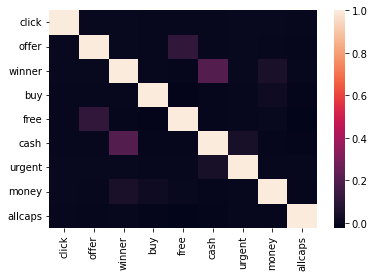

In [10]:
sns.heatmap(sms_raw.corr())

This is actually a great looking plot for us. Most of the words show strong independence from each other. The only exceptions are **free:offer** and **cash:winner**. For now, let's keep everything in the dataset.

Before we actually run the model, we have to build out our training data. **SKLearn** required us to specify an outcome *(y or dependant variable)* and our inputs *(x or independent variables)*. We'll do that under the titles `data` and `target`.

In [11]:
data = sms_raw[keywords + ['allcaps']]

target = sms_raw['spam']

In [12]:
data.head(5)

,click,offer,winner,buy,free,cash,urgent,money,allcaps
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


### `Preparing the model`

In the previous section we've seen some SKLearn models, and now in this section, we'll use `Naive Bayes` and as the name suggests its Naive and bayes meaning using Bayesian rules.

In [13]:
# Our data is binary / boolean, so we are importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable
y_pred = bnb.predict(data)

# Display our results.
print('Number of mislabeled points out of a total {} points: {}'.format(
  data.shape[0],
  (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points: 604


In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true= target, y_pred=y_pred)

array([[4770,   55],
       [ 549,  198]])

We can actually see that the **type-2** error is kind of bad, so most of the mistakes that we are making are coming from **spam**

### `Conclusion`

Now try adding some of your own features and seeing if you can improve the model's performance. Also try comparing the other types of `Naive Bayes Classifiers` and see which one is best.

You can find the function names for training other kinds of Naive Bayes in this [documentation](http://scikit-learn.org/stable/modules/naive_bayes.html). It is a one word change.


---
[next](./02-network-mining.ipynb)